<font size = 8 color ='336EFF'>Neural Network Image Classification</font>

Import Relevant Libraries

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Import Tensorflow Libraries

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

Import fashion mnist 
The training set contains 60,000 grayscale images, each 28x28 pixels:

In [15]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Each pixel intensity is represented as a byte (0 to 255), so it better to scale it

In [6]:
X_train_full.dtype

dtype('uint8')

Divide train into training and validating datasets

Plot an image using Matplotlib's imshow() function, with a 'binary' color map:

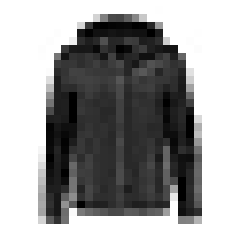

In [24]:
X_val, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

Check the labels

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Here are the corresponding class names:

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Check some examples of the classes in the dataset

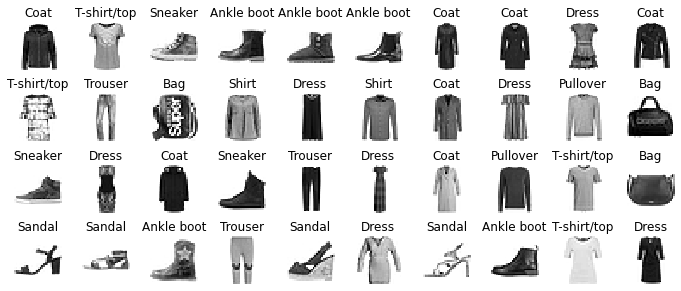

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig('fashion_mnist_plot', tight_layout=False)
plt.show()

Create Neural Network with one flatten layer, 2 hidden units with 300 & 100 units each and relu activation functions, and 1 output layer with 10 neurons and softmax activation function.

Keras sequential model like this:

In [16]:
from matplotlib.cbook import flatten
model = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax'),
])

Check a summary of the model

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Plot the model

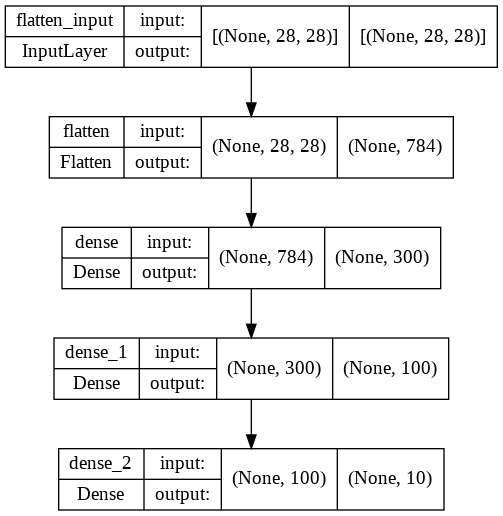

In [20]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

Check the weights and biases, and the layer shape

In [23]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)

[[ 0.04721165  0.01417959 -0.01776097 ...  0.00236282  0.01361928
  -0.04891878]
 [-0.00893927  0.00957053  0.0012957  ...  0.05790043 -0.0222413
  -0.01271605]
 [-0.06353724 -0.00294573 -0.01747377 ... -0.03107569  0.06053816
   0.02314363]
 ...
 [ 0.00200356 -0.05664713  0.04542757 ...  0.03712552 -0.06404944
  -0.04210111]
 [ 0.02370895 -0.05088098  0.0171397  ...  0.03335192 -0.05673359
   0.0541835 ]
 [-0.03598833 -0.03375808  0.07112744 ...  0.0289998   0.03514076
  -0.02327226]]
(784, 300)


Setup model 
*    Telling it which algorithm you want to use to do the optimization (‘sgd’ refers to stochastic gradient descent).
*    Telling it what loss function to use (The loss function for outputs that take the values 1 or 0 is called binary cross entropy).
*    Telling it what other metrics you want to track apart from the loss function (accuracy).

In [26]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training on the data

In [28]:
hist = model.fit(X_train, y_train,
          batch_size=32, epochs=30,
          validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4393 - accuracy: 0.8463 - val_loss: 0.4084 - val_accuracy: 0.8586
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4148 - accuracy: 0.8536 - val_loss: 0.4065 - val_accuracy: 0.8582
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3956 - accuracy: 0.8607 - val_loss: 0.3860 - val_accuracy: 0.8700
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3806 - accuracy: 0.8668 - val_loss: 0.3749 - val_accuracy: 0.8682
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3671 - accuracy: 0.8699 - val_loss: 0.3591 - val_accuracy: 0.8752
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3561 - accuracy: 0.8742 - val_loss: 0.3540 - val_accuracy: 0.8754
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3449 - accuracy: 0.8774 - val_loss: 0.3914 - val_accuracy:

List all data in history

In [30]:
# list all data in history
print(hist.params)
print(hist.epoch)
print(hist.history.keys())

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Evaluate the model

In [31]:
model.evaluate(X_test, y_test)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.3272 - accuracy: 0.8848


0.8848000168800354

Visualizing Loss and Accuracy

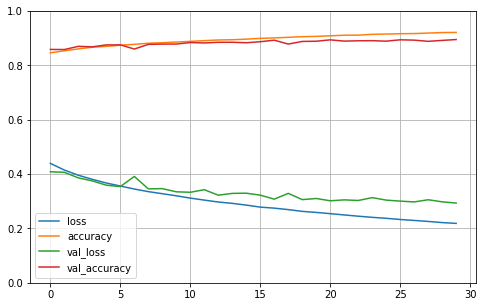

In [33]:
pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()

Test 3 instances of the dataset

In [34]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

To predict the class

In [39]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Add Regularization to our Neural Network

Import the code needed for L2 regularization and dropout

In [41]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

To add L2 regularization, add a bit of extra code in each of the dense layers like this:

kernel_regularizer=regularizers.l2(0.01)

This tells Keras to include the squared values of those parameters in our overall loss function, and weight them by 0.01 in the loss function.

Difference 2: To add Dropout, add a new layer like this:

Dropout(0.3),
This means that the neurons in the previous layer has a probability of 0.3 in dropping out during training.

In [44]:
model_2 = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01)),
])

In [45]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, y_train,
          batch_size=32, epochs=30,
          validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 12s 7ms/step - loss: 1.4266 - accuracy: 0.7378 - val_loss: 0.9664 - val_accuracy: 0.7858
Epoch 2/30
1719/1719 [==============================] - 13s 8ms/step - loss: 1.0415 - accuracy: 0.7561 - val_loss: 0.9627 - val_accuracy: 0.7882
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0304 - accuracy: 0.7562 - val_loss: 0.9392 - val_accuracy: 0.7916
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0233 - accuracy: 0.7563 - val_loss: 0.9627 - val_accuracy: 0.7874
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0178 - accuracy: 0.7558 - val_loss: 0.9216 - val_accuracy: 0.7936
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0142 - accuracy: 0.7580 - val_loss: 0.9309 - val_accuracy: 0.7860
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0067 - accuracy: 0.7584 - val_loss: 0.9628 - val_ac

Plot the training loss and validation loss

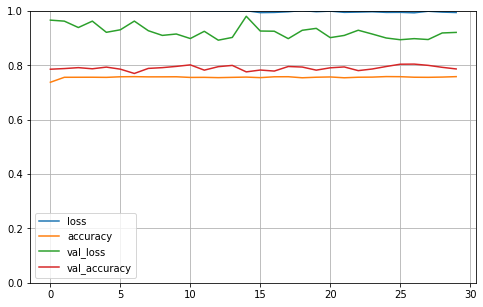

In [46]:
pd.DataFrame(hist_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot_2")
plt.show()

In [47]:
model_2.evaluate(X_test, y_test)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.9511 - accuracy: 0.7731


0.7731000185012817

Saving and loading model

In [48]:
model.save("my_keras_model.h5")

In [49]:
model = tf.keras.models.load_model("my_keras_model.h5")
model.predict(X_new)

array([[2.0863206e-06, 4.4533898e-08, 4.8282582e-06, 5.6702233e-06,
        7.1496734e-06, 2.3550955e-03, 1.7422022e-06, 7.7040396e-03,
        4.3223533e-04, 9.8948717e-01],
       [5.4096821e-05, 4.1333732e-09, 9.9862814e-01, 1.5892440e-09,
        1.2050873e-03, 3.7103615e-11, 1.1262538e-04, 3.6010838e-12,
        8.1101710e-08, 3.5242043e-09],
       [2.1338565e-05, 9.9997783e-01, 3.2277704e-08, 4.9902678e-07,
        2.6139068e-07, 1.6264590e-11, 3.2737510e-08, 3.2987715e-09,
        7.9445401e-09, 7.8476288e-12]], dtype=float32)